# YouTube Tanking 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
df = pd.read_csv('유튜브랭킹.csv')
df.head(3)

,순위,카테고리,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,"70,200,000","21,457,090,000",395
1,2,음악/댄스/가수,HYBE LABELS,"63,000,000","20,496,840,000",725
2,3,음악/댄스/가수,BANGTANTV,"61,500,000","14,077,940,000","1,646"


In [6]:
df['구독자수'] = df['구독자수'].str.replace(',','').astype(int)
df['조회수'] = df['조회수'].str.replace(',','').astype(np.int64)
df['비디오수'] = df['비디오수'].str.replace(',','').astype(int)
df.head(3)

,순위,카테고리,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,1646


- 구독자수 Top20

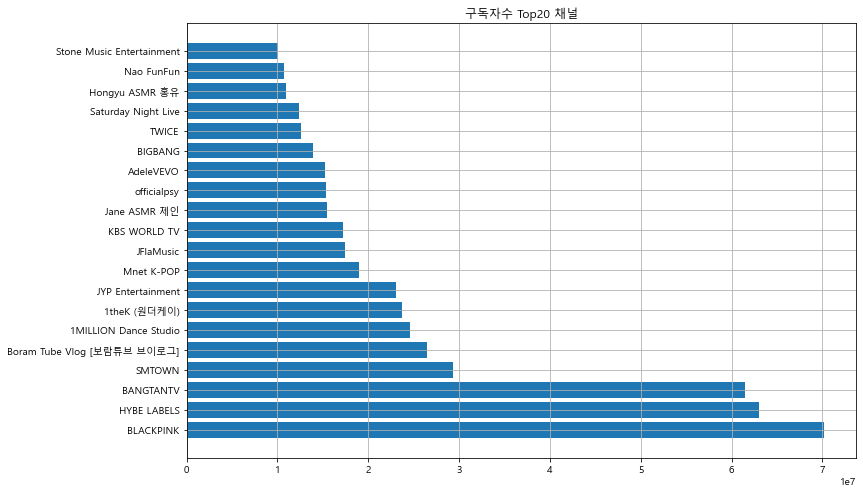

In [8]:
plt.figure(figsize=(12,8))
plt.barh(df.채널명.head(20), df.구독자수.head(20))
plt.title('구독자수 Top20 채널')
plt.grid()
plt.show()

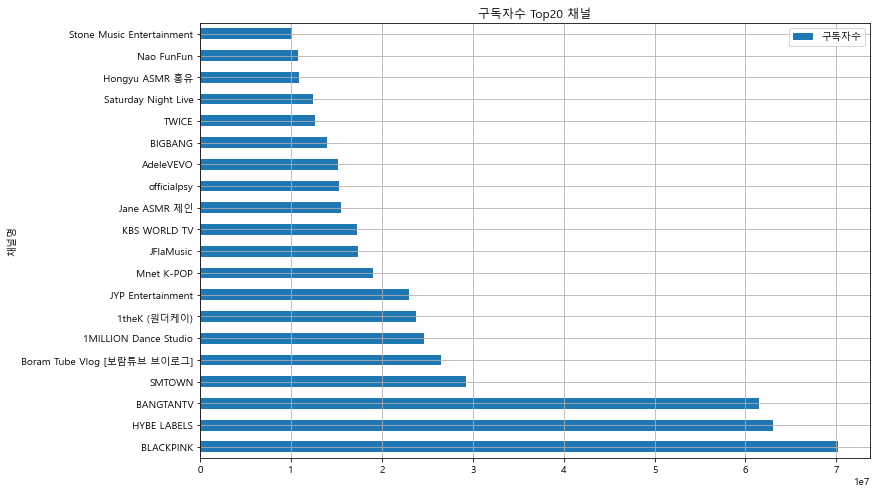

In [9]:
df2 = df[['채널명','구독자수']].head(20)
df2.set_index('채널명', inplace=True)
df2.plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구독자수 Top20 채널')
plt.show()

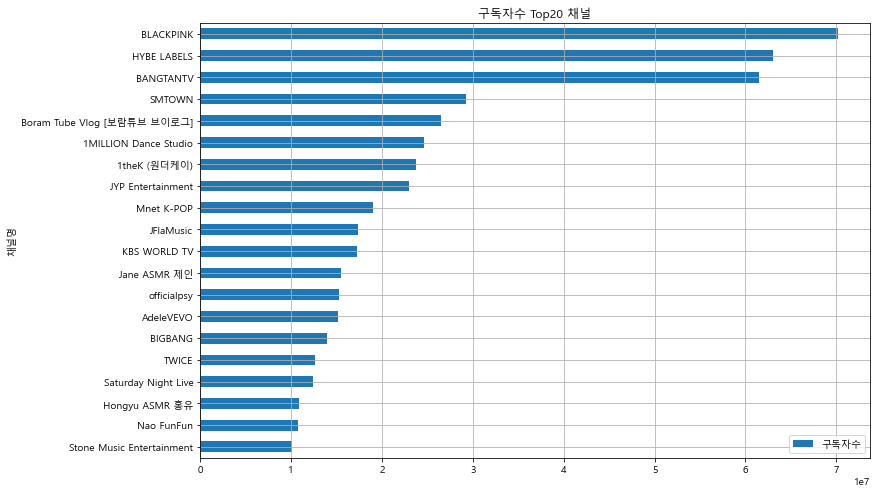

In [10]:
df2.sort_values(by='구독자수').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구독자수 Top20 채널')
plt.show()

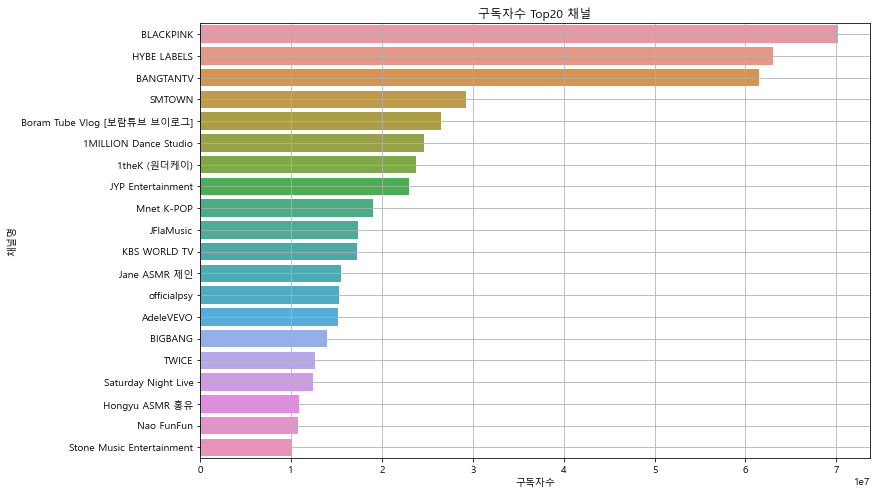

In [13]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='구독자수', data=df2.head(20))
plt.title('구독자수 Top20 채널')
plt.grid()
plt.show()

- 조회수 기준 Top20 채널

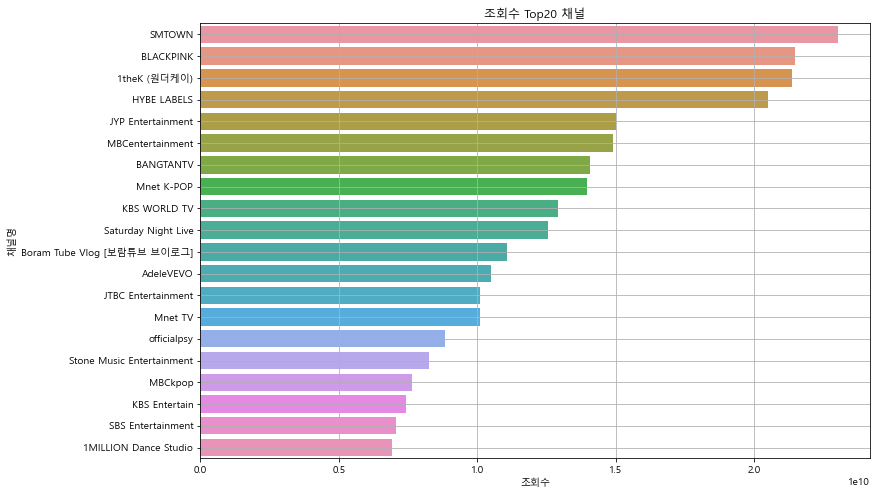

In [15]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='조회수', ascending=False).head(20)
sns.barplot(y='채널명', x='조회수', data=df2)
plt.title('조회수 Top20 채널')
plt.grid()
plt.show()

- 비디오수 기준 Top20

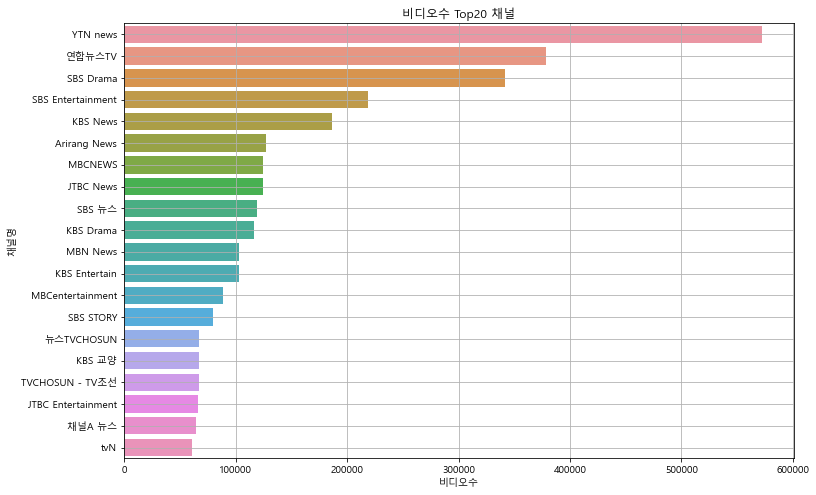

In [16]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='비디오수', ascending=False).head(20)
sns.barplot(y='채널명', x='비디오수', data=df2)
plt.title('비디오수 Top20 채널')
plt.grid()
plt.show()

- 키테고리별 채널수

In [18]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,172
TV/방송,144
미분류,126
키즈/어린이,89
음식/요리/레시피,83
게임,70
BJ/인물/연예인,66
뉴스/정치/사회,53
패션/미용,42
취미/라이프,37


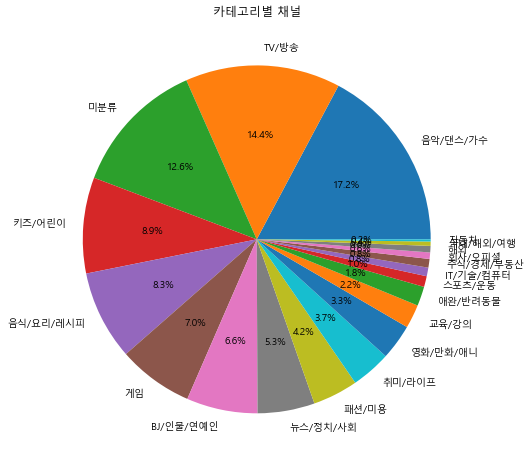

In [34]:
df3 = df.카테고리.value_counts().to_frame().head(20)

plt.figure(figsize=(12,8))
plt.pie('카테고리', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('카테고리별 채널')
plt.show()

- 카테고리별 구독자수 합계

In [25]:
df.groupby('카테고리')['구독자수'].agg([sum])

,sum
카테고리,
BJ/인물/연예인,93710000
IT/기술/컴퓨터,8410000
TV/방송,241660000
게임,70960000
교육/강의,24740000
국내/해외/여행,3790000
뉴스/정치/사회,75100000
미분류,133330000
스포츠/운동,14850000


In [29]:
df4 = df.groupby('카테고리')['구독자수'].agg(['count','sum'])
df4.columns = ['채널수','구독자수']
df4.sort_values(by='구독자수', ascending=False, inplace=True)
df4

,채널수,구독자수
카테고리,,
음악/댄스/가수,172,715400000
키즈/어린이,89,270640000
TV/방송,144,241660000
음식/요리/레시피,83,185020000
미분류,126,133330000
BJ/인물/연예인,66,93710000
뉴스/정치/사회,53,75100000
게임,70,70960000
취미/라이프,37,48930000


In [27]:
df.groupby('카테고리')['구독자수'].sum().to_frame()

,구독자수
카테고리,
BJ/인물/연예인,93710000
IT/기술/컴퓨터,8410000
TV/방송,241660000
게임,70960000
교육/강의,24740000
국내/해외/여행,3790000
뉴스/정치/사회,75100000
미분류,133330000
스포츠/운동,14850000


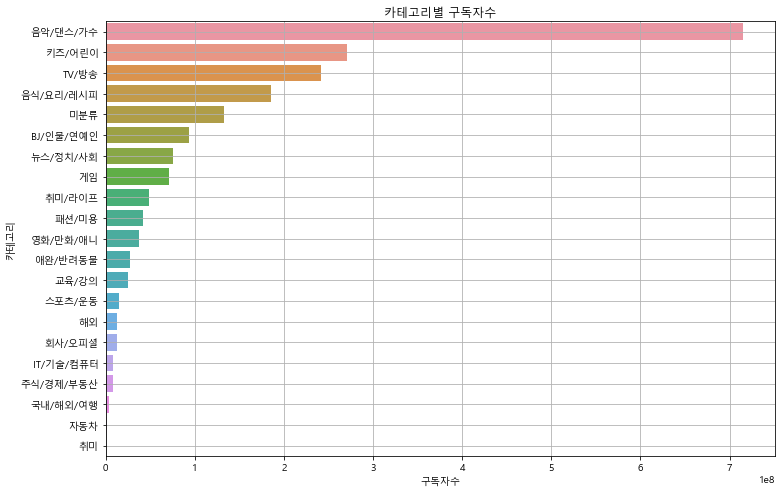

In [33]:
plt.figure(figsize=(12,8))
sns.barplot( x='구독자수', y=df4.index, data=df4)
plt.title('카테고리별 구독자수')
plt.grid()
plt.show()

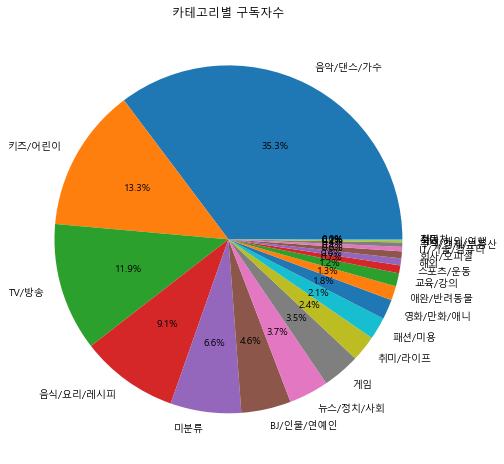

In [35]:
plt.figure(figsize=(12,8))
plt.pie('구독자수', labels=df4.index, data=df4, autopct='%.1f%%')
plt.title('카테고리별 구독자수')
plt.show()